In [1]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/glasses/2015_01_srcc_meets_imams_in_minnesota-3_%2821897965831%29_0.jpg  
  inflating: data/train/glasses/2016-02-04_timon_gremmels_-_mdl_hessen_-_3379-2-bearbeitet_1.jpg  
  inflating: data/train/glasses/2016-02-04_timon_gremmels_-_mdl_hessen_-_3379-2-bearbeitet_2.jpg  
  inflating: data/train/glasses/2016-02-04_timon_gremmels_-_mdl_hessen_-_3379-2-bearbeitet_3.jpg  
  inflating: data/train/glasses/2016-02-04_timon_gremmels_-_mdl_hessen_-_3379-2-bearbeitet_4.jpg  
  inflating: data/train/glasses/2017-05-15-17-40-17_1.jpg  
  inflating: data/train/glasses/2017-05-15-17-40-17_2.jpg  
  inflating: data/train/glasses/2017-05-15-17-40-17_4.jpg  
  inflating: data/train/glasses/2017-05-31-18-55-32-900x600_0.jpg  
  inflating: data/train/glasses/2017-05-31-18-55-32-900x600_4.jpg  
  inflating: data/train/glasses/2017-11-30-18-14-56_2.jpg  
  inflating: data/train/glasses/2017-11-30-18-14-56_3.jpg  
  inflating: data/t

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten
from keras.models import Model

# Instantiate the VGG16 model (pre-trained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # num_classes is the number of your target classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory('data/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory('data/val', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('data/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

# Train the model using the data generator
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=val_generator, validation_steps=len(val_generator))

# Extract loss and accuracy data from the history object
loss_data = history.history['loss']
val_loss_data = history.history['val_loss']
accuracy_data = history.history['accuracy']
val_accuracy_data = history.history['val_accuracy']

import matplotlib.pyplot as plt

def plot_loss_curve(loss, val_loss):
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 6))

    # Plot loss curves
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_accuracy_curve(accuracy, val_accuracy):
    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 6))

    # Plot accuracy curves
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot loss and accuracy curves
plot_loss_curve(loss_data, val_loss_data)
plot_accuracy_curve(accuracy_data, val_accuracy_data)



Found 3142 images belonging to 3 classes.
Found 2104 images belonging to 3 classes.
Found 1293 images belonging to 3 classes.
Epoch 1/5
99/99 [==============================] - 52s 512ms/step - loss: 0.2264 - accuracy: 0.9211 - val_loss: 0.0701 - val_accuracy: 0.9748
Epoch 2/5
99/99 [==============================] - 49s 496ms/step - loss: 0.0420 - accuracy: 0.9857 - val_loss: 0.0397 - val_accuracy: 0.9881
Epoch 3/5
99/99 [==============================] - 49s 500ms/step - loss: 0.0317 - accuracy: 0.9885 - val_loss: 0.0910 - val_accuracy: 0.9743
Epoch 4/5
99/99 [==============================] - 49s 499ms/step - loss: 0.0269 - accuracy: 0.9905 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 5/5
99/99 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9943

In [3]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator,)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 9s 219ms/step - loss: 0.0357 - accuracy: 0.9923
Test Loss: 0.035735081881284714
Test Accuracy: 0.992266058921814


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Calculate additional metrics
predictions = model.predict_generator(test_generator, )
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate metrics


print("Test Loss:", loss)
print("Test Accuracy:", accuracy)





<ipython-input-4-7bb0d9fa52b9>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, )


Test Loss: 0.035735081881284714
Test Accuracy: 0.992266058921814


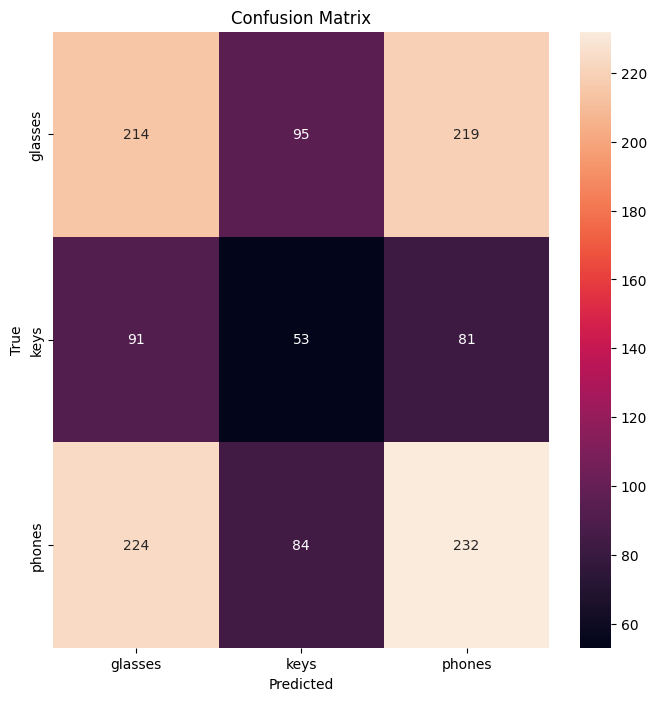

In [5]:
# prompt: confusion matrix for multi class

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [30]:

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_labels))


Classification Report:
              precision    recall  f1-score   support

     glasses       0.40      0.41      0.40       528
        keys       0.23      0.24      0.23       225
      phones       0.44      0.43      0.43       540

    accuracy                           0.39      1293
   macro avg       0.36      0.36      0.36      1293
weighted avg       0.39      0.39      0.39      1293



In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Determine Input Size
input_shape = (128, 128, 3)  # Assuming RGB images

# Create a Sequential model
model = Sequential()
# Add Convolutional Layers
model.add(Con2D(64, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add Pooling Layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))  # Dropout regularization

# Add Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout regularization
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Create data generators for training, validation, and testing
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    'data/val',
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    'data/test',
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    shuffle=False
)

# Train the model
model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Generate predictions on the test set
test_predictions = model.predict(test_generator)
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate metrics
print("Classification Report:")
print(classification_report(test_true_labels, test_predicted_labels, target_names=class_labels))

print("Confusion Matrix:")
print(confusion_matrix(test_true_labels, test_predicted_labels))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               15745152  
                                                        

<ipython-input-9-19c45b0c0ce0>:63: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


393/393 [==============================] - 13s 25ms/step - loss: 0.9105 - accuracy: 0.6104 - val_loss: 0.6529 - val_accuracy: 0.7239
Epoch 2/10
393/393 [==============================] - 10s 25ms/step - loss: 0.5022 - accuracy: 0.7954 - val_loss: 0.5353 - val_accuracy: 0.8089
Epoch 3/10
393/393 [==============================] - 11s 29ms/step - loss: 0.2599 - accuracy: 0.9118 - val_loss: 0.5888 - val_accuracy: 0.8232
Epoch 4/10
393/393 [==============================] - 9s 23ms/step - loss: 0.1400 - accuracy: 0.9545 - val_loss: 0.6471 - val_accuracy: 0.8332
Epoch 5/10
393/393 [==============================] - 8s 21ms/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.7057 - val_accuracy: 0.8455
Epoch 6/10
393/393 [==============================] - 9s 22ms/step - loss: 0.0146 - accuracy: 0.9965 - val_loss: 0.9835 - val_accuracy: 0.8446
Epoch 7/10
393/393 [==============================] - 12s 31ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 1.3735 - val_accuracy: 0.7975
Epoch 

In [10]:


model.save("model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
import tensorflow as tf

# Load the Keras model
model = tf.keras.models.load_model('model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

In [21]:
import tensorflow as tf

class_labels = list(test_generator.class_indices.keys())


import numpy as np
# Load the model
model = tf.keras.models.load_model('model.h5')

# Load the image
image = tf.keras.preprocessing.image.load_img('image6.jpg', target_size=(128, 128, 3))

# Preprocess the image
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
# print(image.shape)


# Make prediction
predictions = model.predict(image)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Print the predicted class
print("Predicted class:", predicted_class," >> ",class_labels[predicted_class])


1/1 [==============================] - 0s 68ms/step
Predicted class: 0  >>  glasses
